<a href="https://colab.research.google.com/github/Jalalbaim/Number_Plate_Recognition/blob/main/NumberPlate_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os
#d4e1456f66ac2f1379f227353e8a10fc
od.download("https://www.kaggle.com/datasets/otoluk/latvian-car-number-plates")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamedjalalbaim
Your Kaggle Key: ··········


100%|██████████| 5.15M/5.15M [00:00<00:00, 76.5MB/s]

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras

In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.7, 1.5),
    zoom_range=[0.95, 1.05]
)

In [5]:
# Train data
data = '/content/latvian-car-number-plates'
img_data = datagen.flow_from_directory(
    data,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 1404 images belonging to 2 classes.


(32, 224, 224, 3)


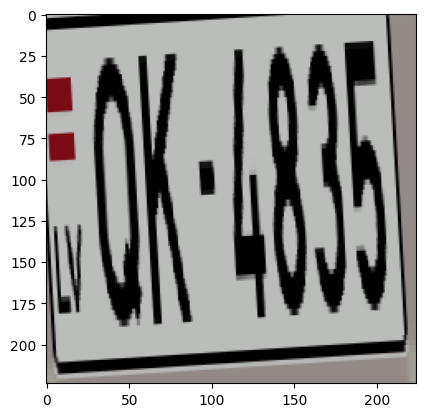

(32, 224, 224, 3)


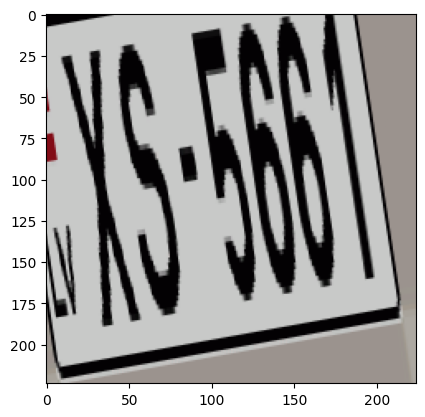

(32, 224, 224, 3)


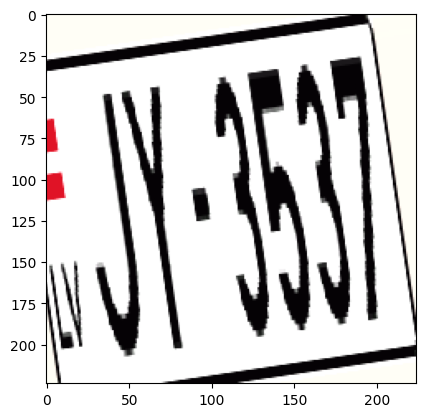

(32, 224, 224, 3)


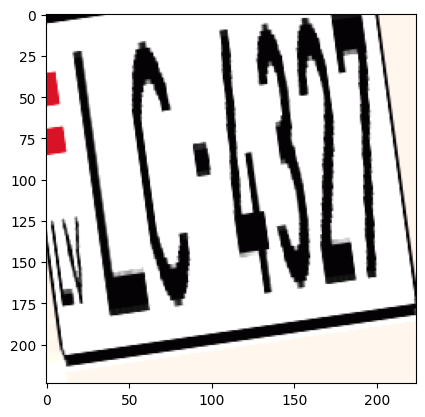

(32, 224, 224, 3)


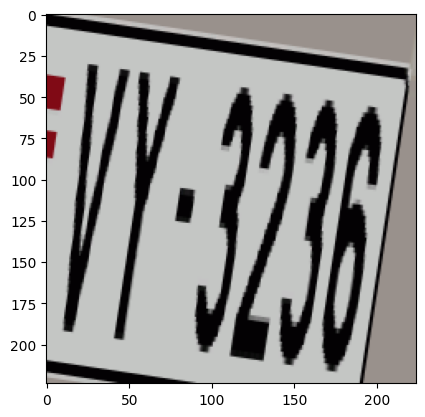

(32, 224, 224, 3)


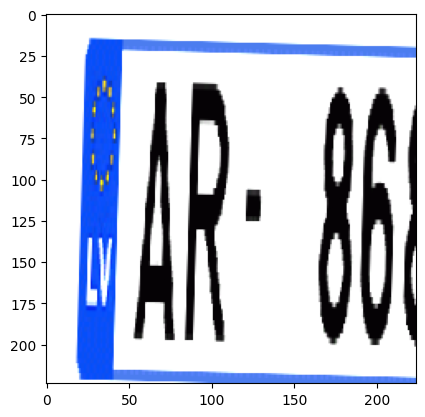

(32, 224, 224, 3)


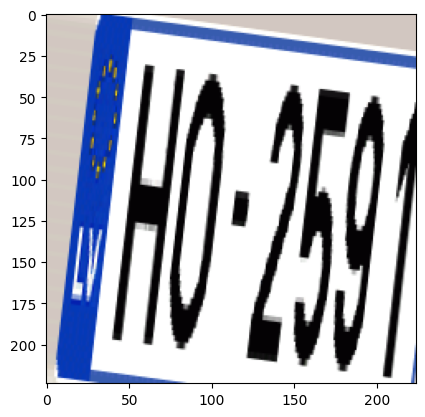

(32, 224, 224, 3)


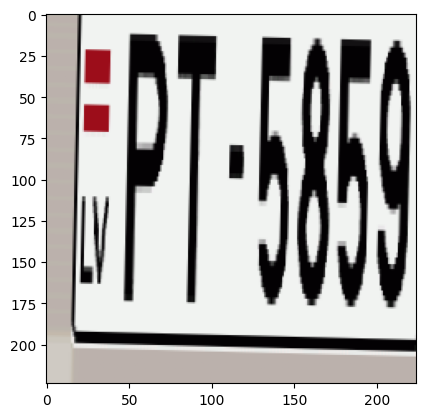

(32, 224, 224, 3)


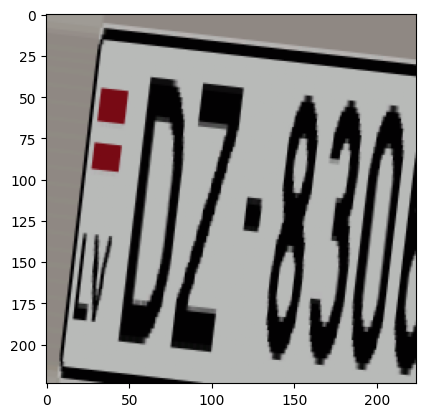

(32, 224, 224, 3)


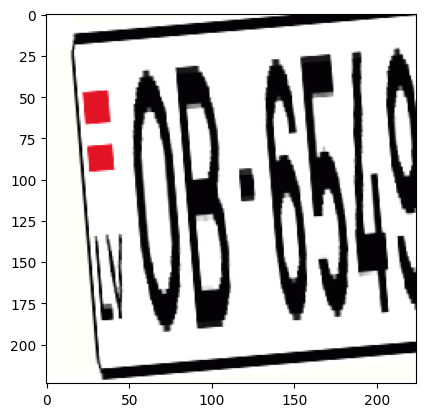

In [6]:
# Discovering Datasets
batch_size = 32
for i in range(10):
    img, labels = img_data.next()
    if img.shape[0] == 32:
        print(img.shape)
        plt.imshow(np.squeeze(img[i]))
        plt.show()